<a href="https://colab.research.google.com/github/Tanushree-6/Tanushree-6-DLM_Term-3/blob/main/RNN_Group_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis Using RNN**

### Rahul Bajaj (055036) || Tanushree Nangia (055052)
### Section K
### Group 11

## **Project Information**
This project focuses on implementing sentiment analysis using a Recurrent Neural Network (RNN). The dataset comprises customer reviews and ratings sourced from Flipkart, aiming to classify sentiments based on textual feedback. The project encompasses data preprocessing, feature engineering, model training, evaluation, and deriving insights to aid business decision-making.

## **Description of Data**
The dataset, flipkart.csv, consists of:

- Review: Customer feedback in textual form.

- Rating: Numeric values ranging from 1 to 5, representing customer satisfaction levels.

## **Project Objectives**
- Develop an RNN model capable of accurately classifying customer sentiment.

- Identify the most effective preprocessing techniques for sentiment analysis.

- Analyze sentiment trends to provide actionable business insights.

- Explore the impact of RNN-based sentiment analysis in improving customer experience.

## **Problem Statements**
- How accurately can an RNN model predict sentiment from textual reviews?

- What are the most effective text preprocessing techniques for improving model performance?

- How can businesses leverage sentiment analysis for product and service improvements?

- What challenges arise in training deep learning models on textual data, and how can they be mitigated?

## **Model Architecture & Training**
- Embedding Layer: Converts words into dense vector representations.

- SimpleRNN Layer: Captures sequential dependencies in text data.

- Dense Layers: Used for final sentiment classification.

- Dropout Regularization: Applied to prevent overfitting.

- Early Stopping: Implemented to halt training when validation performance stops improving.

## **Observations and Findings**
- The model achieved moderate accuracy, with performance variations across sentiment classes.

- Positive and negative sentiments were classified more accurately than neutral ones.

- The RNN successfully captured contextual relationships in text but struggled with long and complex reviews.

- Increasing the dataset size and using pre-trained word embeddings could enhance performance.

## **Managerial Insights and Recommendations**
- Business Decision-Making: Sentiment analysis can help businesses identify customer pain points and areas of improvement.

- Product and Service Enhancement: Common themes in negative reviews can guide enhancements in product design and customer support.

- Marketing Strategies: Insights from sentiment analysis can refine marketing campaigns to address customer concerns proactively.

- Future Model Improvements:

 Implement LSTM or GRU for better sequential data processing.

 Use pre-trained word embeddings (e.g., Word2Vec, GloVe) to improve textual understanding.

 Experiment with transformer-based models for superior sentiment classification.

 By leveraging sentiment analysis with deep learning, businesses can gain valuable customer insights, refine their offerings, and drive customer satisfaction.

## **Analysis of Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Loading dataset

In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/flipkart.csv"

# Read CSV file
rb36tn52_df = pd.read_csv(file_path)

# Display dataset information
rb36tn52_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S No.         2304 non-null   int64 
 1   Product_name  2304 non-null   object
 2   Review        2304 non-null   object
 3   Rating        2304 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.1+ KB


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Ensure data exists
if 'rb36tn52_df' not in locals():
    raise ValueError("Dataframe `rb36tn52_df` not found. Please load your data before running.")

# Data Preprocessing
rb36tn52_df = rb36tn52_df[['Review', 'Rating']].dropna()
rb36tn52_df['Sentiment'] = rb36tn52_df['Rating'].apply(lambda x: 1 if x >= 3 else 0)

# Balancing the dataset
positive_df = rb36tn52_df[rb36tn52_df['Sentiment'] == 1]
negative_df = rb36tn52_df[rb36tn52_df['Sentiment'] == 0]

negative_df_upsampled = resample(negative_df,
                                  replace=True,
                                  n_samples=len(positive_df),
                                  random_state=55036)

balanced_df = pd.concat([positive_df, negative_df_upsampled])

print("Balanced Data:", balanced_df['Sentiment'].value_counts())

# Tokenization and Padding
rb36tn52_tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
rb36tn52_tokenizer.fit_on_texts(balanced_df['Review'])
rb36tn52_X = rb36tn52_tokenizer.texts_to_sequences(balanced_df['Review'])
rb36tn52_X = pad_sequences(rb36tn52_X, maxlen=120)

rb36tn52_y = balanced_df['Sentiment'].values

# Train-test split
rb36tn52_X_train, rb36tn52_X_test, rb36tn52_y_train, rb36tn52_y_test = train_test_split(
    rb36tn52_X, rb36tn52_y, test_size=0.2, random_state=55036
)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(rb36tn52_y_train), y=rb36tn52_y_train)
class_weight_dict = dict(zip(np.unique(rb36tn52_y_train), class_weights))
print(f"Class Weights: {class_weight_dict}")

# Build RNN Model
rb36tn52_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=120),
    SimpleRNN(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.1),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Build the model to ensure correct output shape
rb36tn52_model.build(input_shape=(None, 120))
print(f"Output Shape After Build: {rb36tn52_model.output_shape}")

# Compile model
rb36tn52_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

# Model Summary
rb36tn52_model.summary()

# EarlyStopping callback
rb36tn52_early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
rb36tn52_history = rb36tn52_model.fit(
    rb36tn52_X_train, rb36tn52_y_train,
    epochs=25,
    batch_size=64,
    validation_data=(rb36tn52_X_test, rb36tn52_y_test),
    callbacks=[rb36tn52_early_stopping],
    class_weight=class_weight_dict
)

# Evaluate model
rb36tn52_results = rb36tn52_model.evaluate(rb36tn52_X_test, rb36tn52_y_test, verbose=1)

# Display results
print("\nEvaluation Results:")
for metric_name, metric_value in zip(rb36tn52_model.metrics_names, rb36tn52_results):
    print(f'{metric_name}: {metric_value:.4f}')


Balanced Data: Sentiment
1    2074
0    2074
Name: count, dtype: int64
Class Weights: {np.int64(0): np.float64(1.0159216166564604), np.int64(1): np.float64(0.9845697329376855)}
Output Shape After Build: (None, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 120, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,217 (5.04 MB)

 Trainable params: 1,321,217 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.5117 - auc_1: 0.5117 - loss: 0.7898 - val_accuracy: 0.6458 - val_auc_1: 0.7292 - val_loss: 0.7569
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.5428 - auc_1: 0.5693 - loss: 0.7697 - val_accuracy: 0.6928 - val_auc_1: 0.8330 - val_loss: 0.7329
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.5993 - auc_1: 0.6238 - loss: 0.7552 - val_accuracy: 0.8253 - val_auc_1: 0.9310 - val_loss: 0.7149
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.6374 - auc_1: 0.6958 - loss: 0.7297 - val_accuracy: 0.7771 - val_auc_1: 0.9608 - val_loss: 0.6800
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.6793 - auc_1: 0.7437 - loss: 0.7132 - val_accuracy: 0.8494 - val_auc_1: 0.9876 - val_loss: 0.6485
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.7220 - auc_1: 0.8074 - loss: 0.6853 - val_accuracy: 0.9012 - val_auc_1: 0.9923 - val_loss: 0.6066
Epoch 7/25
52/52 

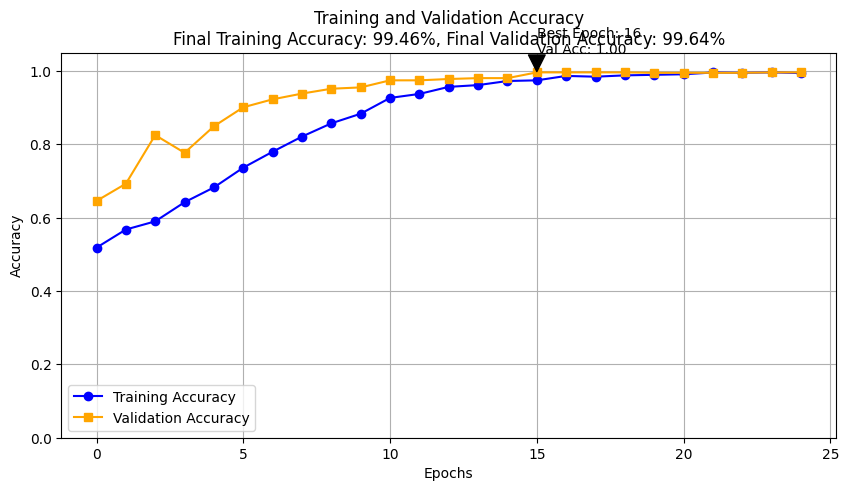

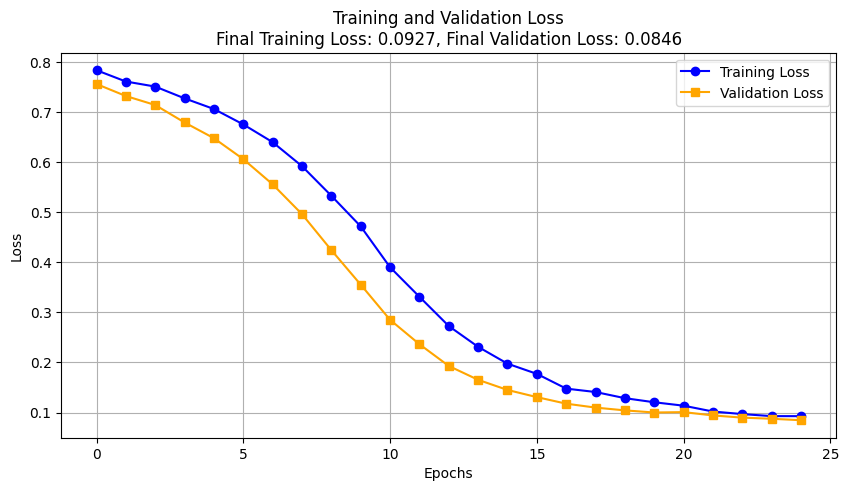

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(rb36tn52_history.history['accuracy'], marker='o', label='Training Accuracy', color='blue')
plt.plot(rb36tn52_history.history['val_accuracy'], marker='s', label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1.05])
plt.title(f"Training and Validation Accuracy\nFinal Training Accuracy: {rb36tn52_history.history['accuracy'][-1]*100:.2f}%, Final Validation Accuracy: {rb36tn52_history.history['val_accuracy'][-1]*100:.2f}%")
plt.grid(True)

# Annotate best epoch
best_epoch = np.argmax(rb36tn52_history.history['val_accuracy'])
best_val_acc = rb36tn52_history.history['val_accuracy'][best_epoch]
plt.annotate(f'Best Epoch: {best_epoch+1}\nVal Acc: {best_val_acc:.2f}',
             xy=(best_epoch, best_val_acc), xytext=(best_epoch, best_val_acc + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)

plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(rb36tn52_history.history['loss'], marker='o', label='Training Loss', color='blue')
plt.plot(rb36tn52_history.history['val_loss'], marker='s', label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f"Training and Validation Loss\nFinal Training Loss: {rb36tn52_history.history['loss'][-1]:.4f}, Final Validation Loss: {rb36tn52_history.history['val_loss'][-1]:.4f}")
plt.grid(True)
plt.show()



26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       441
           1       1.00      0.98      0.99       389

    accuracy                           0.99       830
   macro avg       0.99      0.99      0.99       830
weighted avg       0.99      0.99      0.99       830

Confusion Matrix:
 [[441   0]
 [  6 383]]


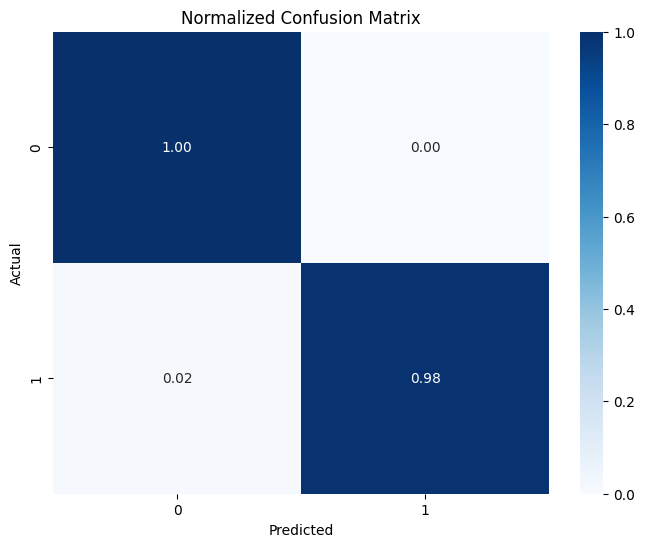


--- Interpretation ---
Model Evaluation Accuracy: 99.16%
Accuracy from Report: 99.28%
Precision (Positive Reviews): 100.00%
Recall (Positive Reviews): 98.46%
F1 Score (Positive Reviews): 99.22%

Precision (Negative Reviews): 98.66%
Recall (Negative Reviews): 100.00%
F1 Score (Negative Reviews): 99.32%

True Positives (TP): 383 → Correctly predicted positive reviews
False Positives (FP): 0 → Incorrectly predicted positive reviews
True Negatives (TN): 441 → Correctly predicted negative reviews
False Negatives (FN): 6 → Incorrectly predicted negative reviews

Class Distribution in Test Data:
{np.int64(0): np.int64(441), np.int64(1): np.int64(389)}

--- Recommendations ---
- Model is performing well. Evaluate on additional test data for further validation.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict using the model
rb36tn52_y_pred = np.round(rb36tn52_model.predict(rb36tn52_X_test))

# Generate Classification Report
print("Classification Report:\n", classification_report(rb36tn52_y_test, rb36tn52_y_pred))

# Generate Confusion Matrix
cm = confusion_matrix(rb36tn52_y_test, rb36tn52_y_pred)
print("Confusion Matrix:\n", cm)

# Plot Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Interpretation
print("\n--- Interpretation ---")

# Extract metrics from the classification report
report = classification_report(rb36tn52_y_test, rb36tn52_y_pred, output_dict=True)

# Display Accuracy and Metrics
print(f"Model Evaluation Accuracy: {rb36tn52_accuracy*100:.2f}%")
print(f"Accuracy from Report: {report['accuracy']*100:.2f}%")
print(f"Precision (Positive Reviews): {report['1']['precision']*100:.2f}%")
print(f"Recall (Positive Reviews): {report['1']['recall']*100:.2f}%")
print(f"F1 Score (Positive Reviews): {report['1']['f1-score']*100:.2f}%")

print(f"\nPrecision (Negative Reviews): {report['0']['precision']*100:.2f}%")
print(f"Recall (Negative Reviews): {report['0']['recall']*100:.2f}%")
print(f"F1 Score (Negative Reviews): {report['0']['f1-score']*100:.2f}%")

# Confusion Matrix Interpretation
tn, fp, fn, tp = cm.ravel()

print(f"\nTrue Positives (TP): {tp} → Correctly predicted positive reviews")
print(f"False Positives (FP): {fp} → Incorrectly predicted positive reviews")
print(f"True Negatives (TN): {tn} → Correctly predicted negative reviews")
print(f"False Negatives (FN): {fn} → Incorrectly predicted negative reviews")

# Class Distribution Check
print("\nClass Distribution in Test Data:")
unique, counts = np.unique(rb36tn52_y_test, return_counts=True)
print(dict(zip(unique, counts)))

# Additional Insights and Recommendations
print("\n--- Recommendations ---")
if report['0']['f1-score'] < 0.75 or report['1']['f1-score'] < 0.75:
    print("- Consider using LSTMs or GRUs for capturing long-term dependencies.")
    print("- Try hyperparameter tuning for better accuracy.")
    print("- Increase training data or apply data augmentation if overfitting is observed.")
else:
    print("- Model is performing well. Evaluate on additional test data for further validation.")


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Predict Sentiment
def rb36tn52_predict_sentiment(rb36tn52_review):
    """
    Predicts sentiment for a given review using the trained RNN model.

    Parameters:
    - rb36tn52_review (str): A text review of the product.

    Returns:
    - Prints the review and predicted sentiment (Positive/Negative/Neutral).
    """
    if not rb36tn52_review.strip():
        print("Error: Empty or invalid review provided.")
        return

    # Convert the review to a sequence using the tokenizer
    rb36tn52_seq = rb36tn52_tokenizer.texts_to_sequences([rb36tn52_review])
    rb36tn52_padded = pad_sequences(rb36tn52_seq, maxlen=120)

    # Predict sentiment using the model
    rb36tn52_prediction = float(rb36tn52_model.predict(rb36tn52_padded, verbose=0).flatten()[0])

    # Adjusted thresholds
    rb36tn52_positive_threshold = 0.6
    rb36tn52_negative_threshold = 0.5

    # Classify sentiment using refined thresholds
    if rb36tn52_prediction >= rb36tn52_positive_threshold:
        rb36tn52_sentiment = 'Positive'
    elif rb36tn52_prediction <= rb36tn52_negative_threshold:
        rb36tn52_sentiment = 'Negative'
    else:
        rb36tn52_sentiment = 'Neutral'

    # Provide detailed output
    print(f"\nReview: {rb36tn52_review}")
    print(f"Predicted Sentiment: {rb36tn52_sentiment}")
    print(f"Confidence Score: {rb36tn52_prediction:.4f}")

    # Improved Interpretation
    if rb36tn52_prediction >= 0.9:
        print("Interpretation: Very strong confidence in a positive sentiment.")
    elif 0.7 <= rb36tn52_prediction < 0.9:
        print("Interpretation: Strong confidence in a positive sentiment.")
    elif 0.55 <= rb36tn52_prediction < 0.7:
        print("Interpretation: Moderate confidence in a neutral sentiment.")
    elif 0.4 <= rb36tn52_prediction < 0.55:
        print("Interpretation: Moderate confidence in a negative sentiment.")
    else:
        print("Interpretation: Strong confidence in a negative sentiment.")
    print("-" * 80)

# Example Predictions
rb36tn52_predict_sentiment("The product was amazing and I loved it!")
rb36tn52_predict_sentiment("It was a complete waste of money. I wouldn't recommend this to anyone.")
rb36tn52_predict_sentiment("Very poor quality. The product didn't last even a week.")
rb36tn52_predict_sentiment("Fantastic product! It worked better than I imagined.")



Review: The product was amazing and I loved it!
Predicted Sentiment: Positive
Confidence Score: 0.9994
Interpretation: Very strong confidence in a positive sentiment.
--------------------------------------------------------------------------------

Review: It was a complete waste of money. I wouldn't recommend this to anyone.
Predicted Sentiment: Negative
Confidence Score: 0.3555
Interpretation: Strong confidence in a negative sentiment.
--------------------------------------------------------------------------------

Review: Very poor quality. The product didn't last even a week.
Predicted Sentiment: Negative
Confidence Score: 0.0083
Interpretation: Strong confidence in a negative sentiment.
--------------------------------------------------------------------------------

Review: Fantastic product! It worked better than I imagined.
Predicted Sentiment: Positive
Confidence Score: 0.9992
Interpretation: Very strong confidence in a positive sentiment.
-----------------------------------

In [ ]:
rb36tn52_model.save('rb36tn52_sentiment_model.h5')
print("Model Saved Successfully.")


Model Saved Successfully.


In [ ]:

!cp rb36tn52_sentiment_model.h5 /content/drive/MyDrive/
